In [ ]:
%pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.8 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("/Users/chandanmohan/Desktop/Reservation-Prediction/artifacts/raw/train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,5884,INN05885,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled
1,9552,INN09553,1,0,0,2,Meal Plan 1,1,Room_Type 1,0,2017,10,27,Corporate,1,0,1,65.00,0,Not_Canceled
2,28900,INN28901,2,0,2,3,Meal Plan 1,0,Room_Type 1,6,2018,6,26,Online,0,0,0,103.64,0,Canceled
3,17603,INN17604,1,0,1,2,Meal Plan 1,0,Room_Type 1,19,2018,5,2,Online,0,0,0,120.00,0,Not_Canceled
4,10754,INN10755,1,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,5,25,Online,0,0,0,106.25,1,Not_Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0","Booking_ID"],inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled
1,1,0,0,2,Meal Plan 1,1,Room_Type 1,0,2017,10,27,Corporate,1,0,1,65.00,0,Not_Canceled
2,2,0,2,3,Meal Plan 1,0,Room_Type 1,6,2018,6,26,Online,0,0,0,103.64,0,Canceled
3,1,0,1,2,Meal Plan 1,0,Room_Type 1,19,2018,5,2,Online,0,0,0,120.00,0,Not_Canceled
4,1,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,5,25,Online,0,0,0,106.25,1,Not_Canceled


In [6]:
df.shape

(28294, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7405)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(20889, 18)

In [11]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
df["no_of_adults"].value_counts()

no_of_adults
2    15147
1     3899
3     1727
0      102
4       14
Name: count, dtype: int64

In [13]:
df["no_of_children"].value_counts()

no_of_children
0     18857
1      1219
2       798
3        13
9         1
10        1
Name: count, dtype: int64

In [14]:
df["no_of_weekend_nights"].value_counts()

no_of_weekend_nights
0    8969
1    5911
2    5770
3     106
4      99
5      19
6      14
7       1
Name: count, dtype: int64

In [15]:
df["no_of_week_nights"].value_counts()

no_of_week_nights
2     5792
1     5728
3     4481
4     1933
0     1457
5     1110
6      148
7       84
8       50
10      45
9       24
11      13
14       6
13       5
12       5
15       4
16       2
17       2
Name: count, dtype: int64

In [16]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    14894
Canceled         5995
Name: count, dtype: int64

In [17]:
cat_cols  = [
    'type_of_meal_plan','required_car_parking_space', 'room_type_reserved','booking_status','repeated_guest', 'market_segment_type',
]

In [18]:
num_cols = [
    'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'
]

In [19]:
len(cat_cols) + len(num_cols)

18

In [20]:
data = df.copy()

In [21]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled
1,1,0,0,2,Meal Plan 1,1,Room_Type 1,0,2017,10,27,Corporate,1,0,1,65.00,0,Not_Canceled
2,2,0,2,3,Meal Plan 1,0,Room_Type 1,6,2018,6,26,Online,0,0,0,103.64,0,Canceled
3,1,0,1,2,Meal Plan 1,0,Room_Type 1,19,2018,5,2,Online,0,0,0,120.00,0,Not_Canceled
4,1,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,5,25,Online,0,0,0,106.25,1,Not_Canceled


In [22]:
def num_plot_dist(df,num_features):
    fig, axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Oranges")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df,x=column,ax=axes[i][1], palette="Oranges")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

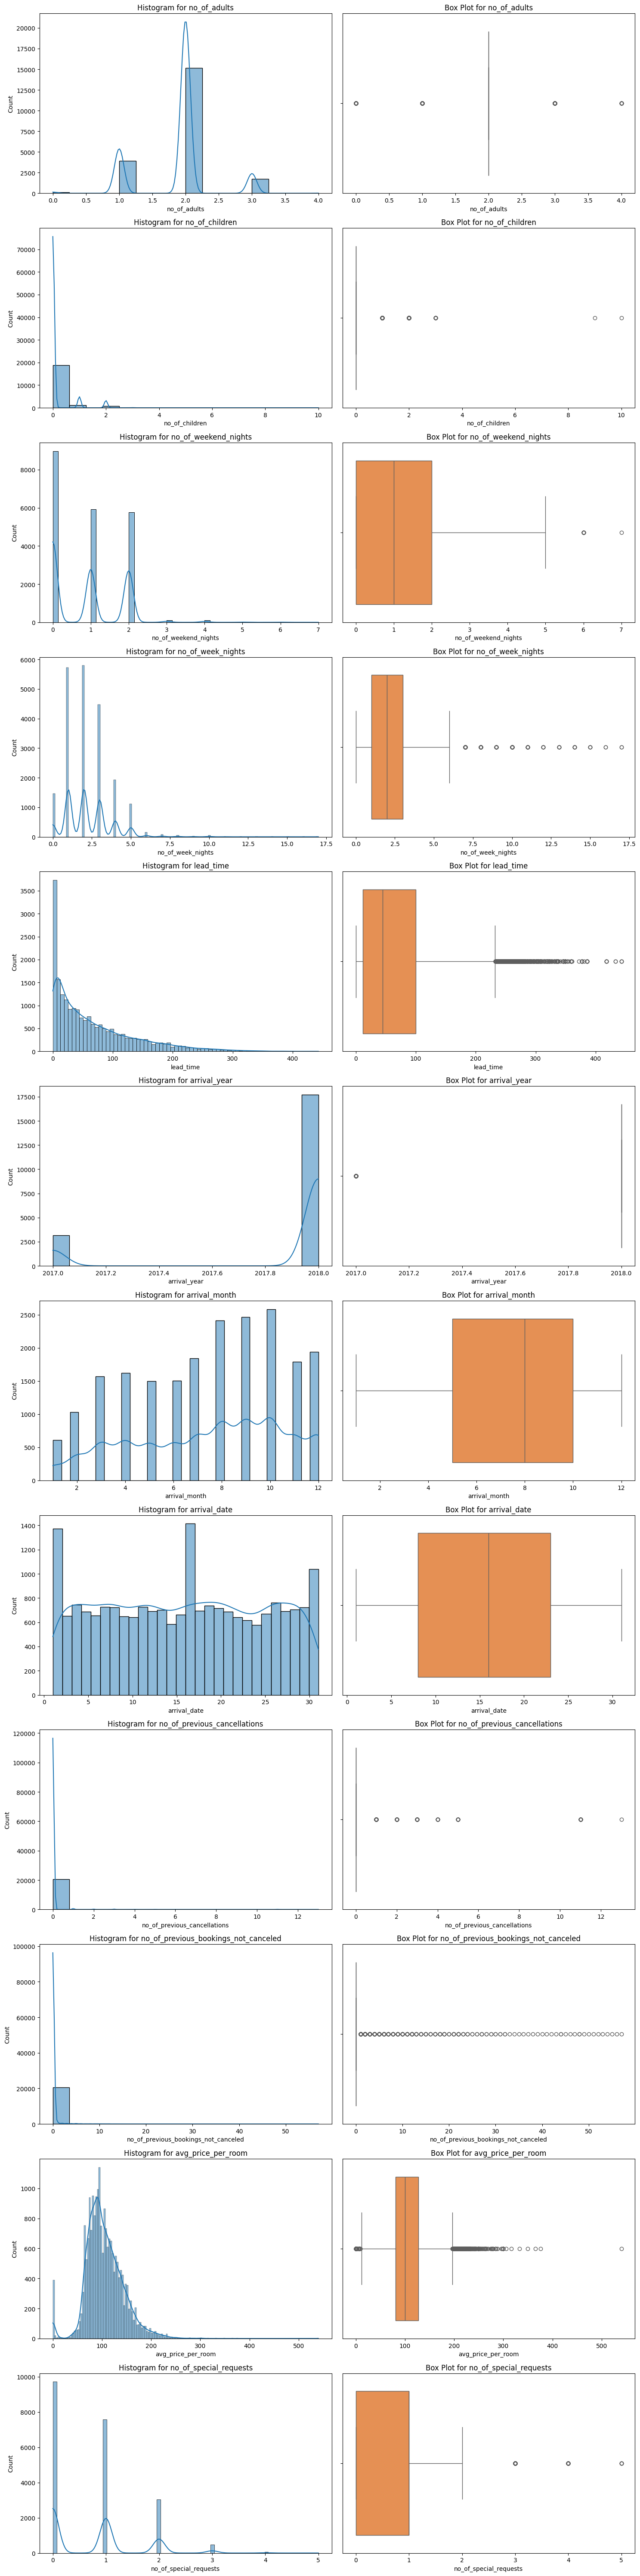

In [23]:
num_plot_dist(data,num_cols)

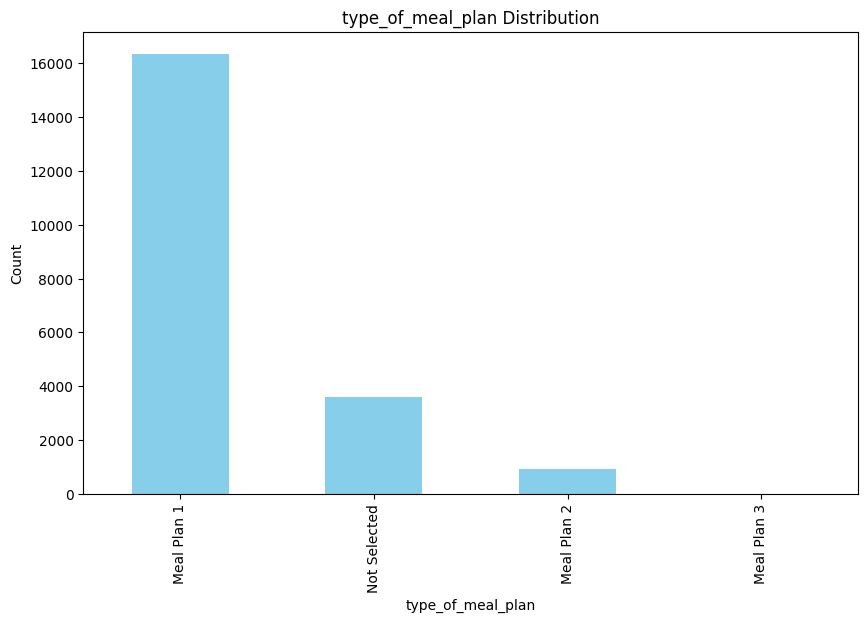

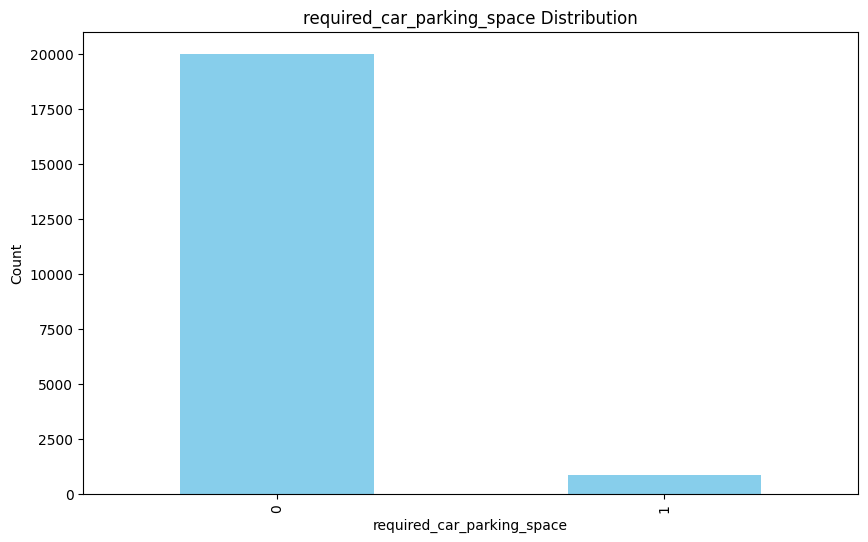

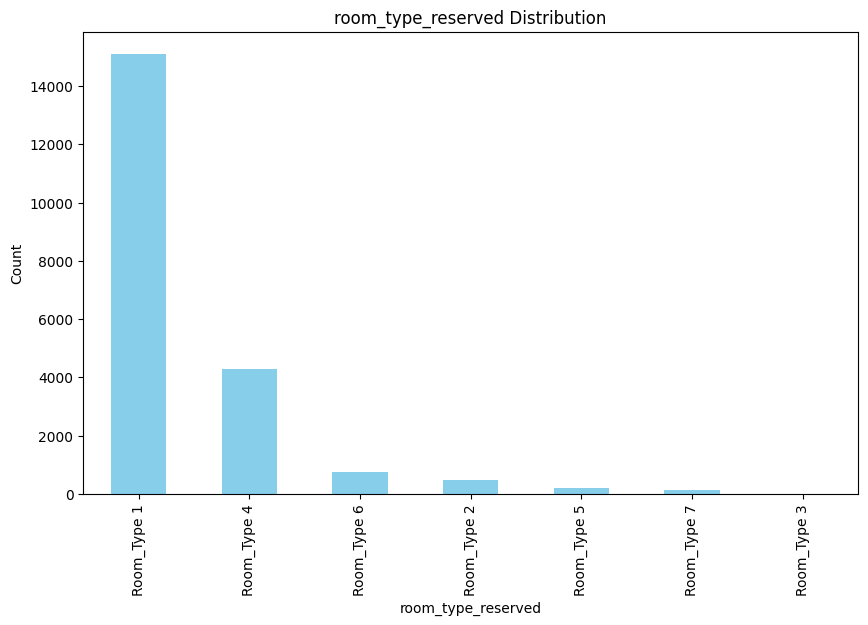

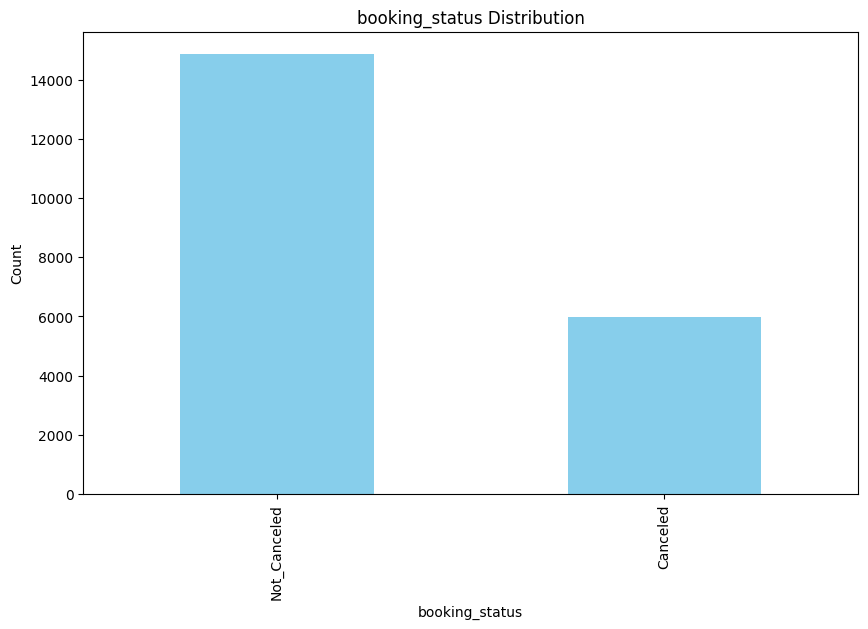

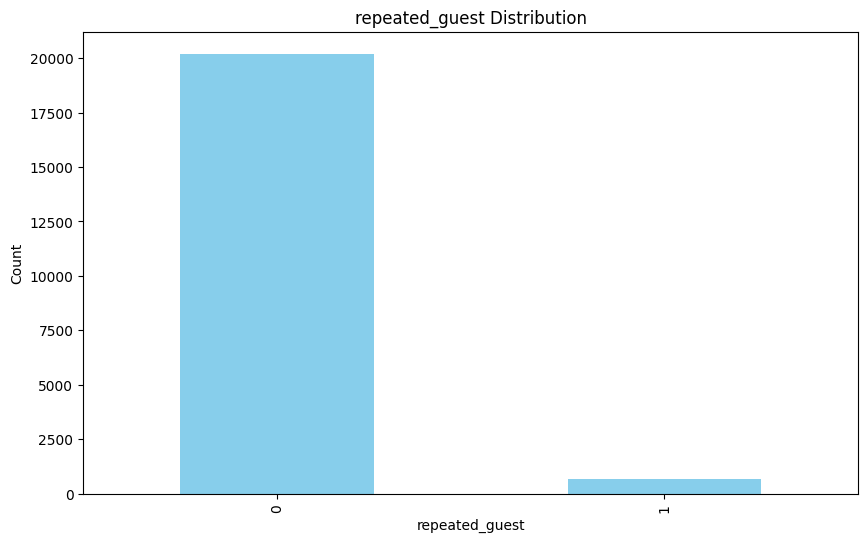

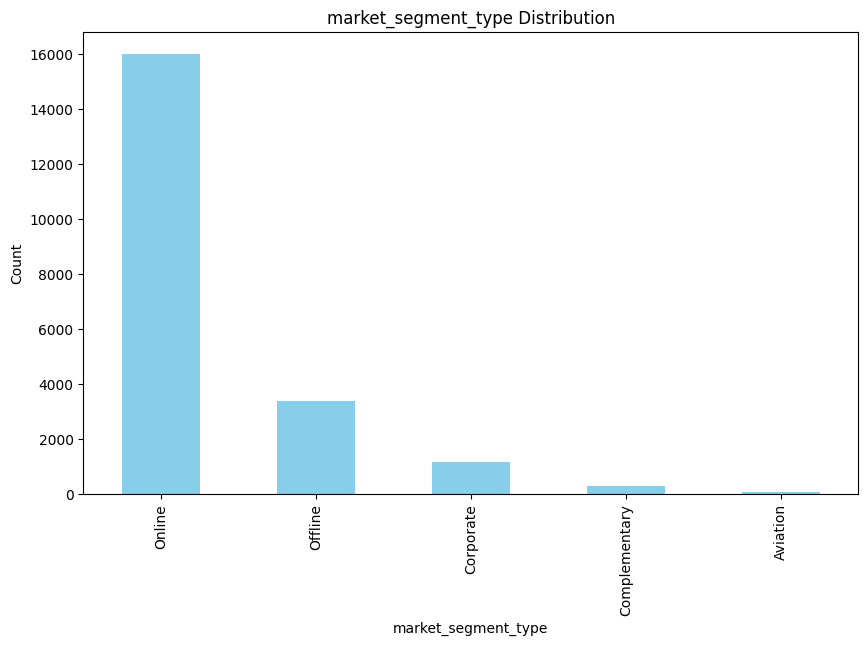

In [24]:
for cat_freature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_freature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_freature} Distribution")
    plt.xlabel(cat_freature)
    plt.ylabel("Count")
    plt.show()

In [25]:
def plot_bivariate_num(df, target,num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2 , figsize=(15,num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()

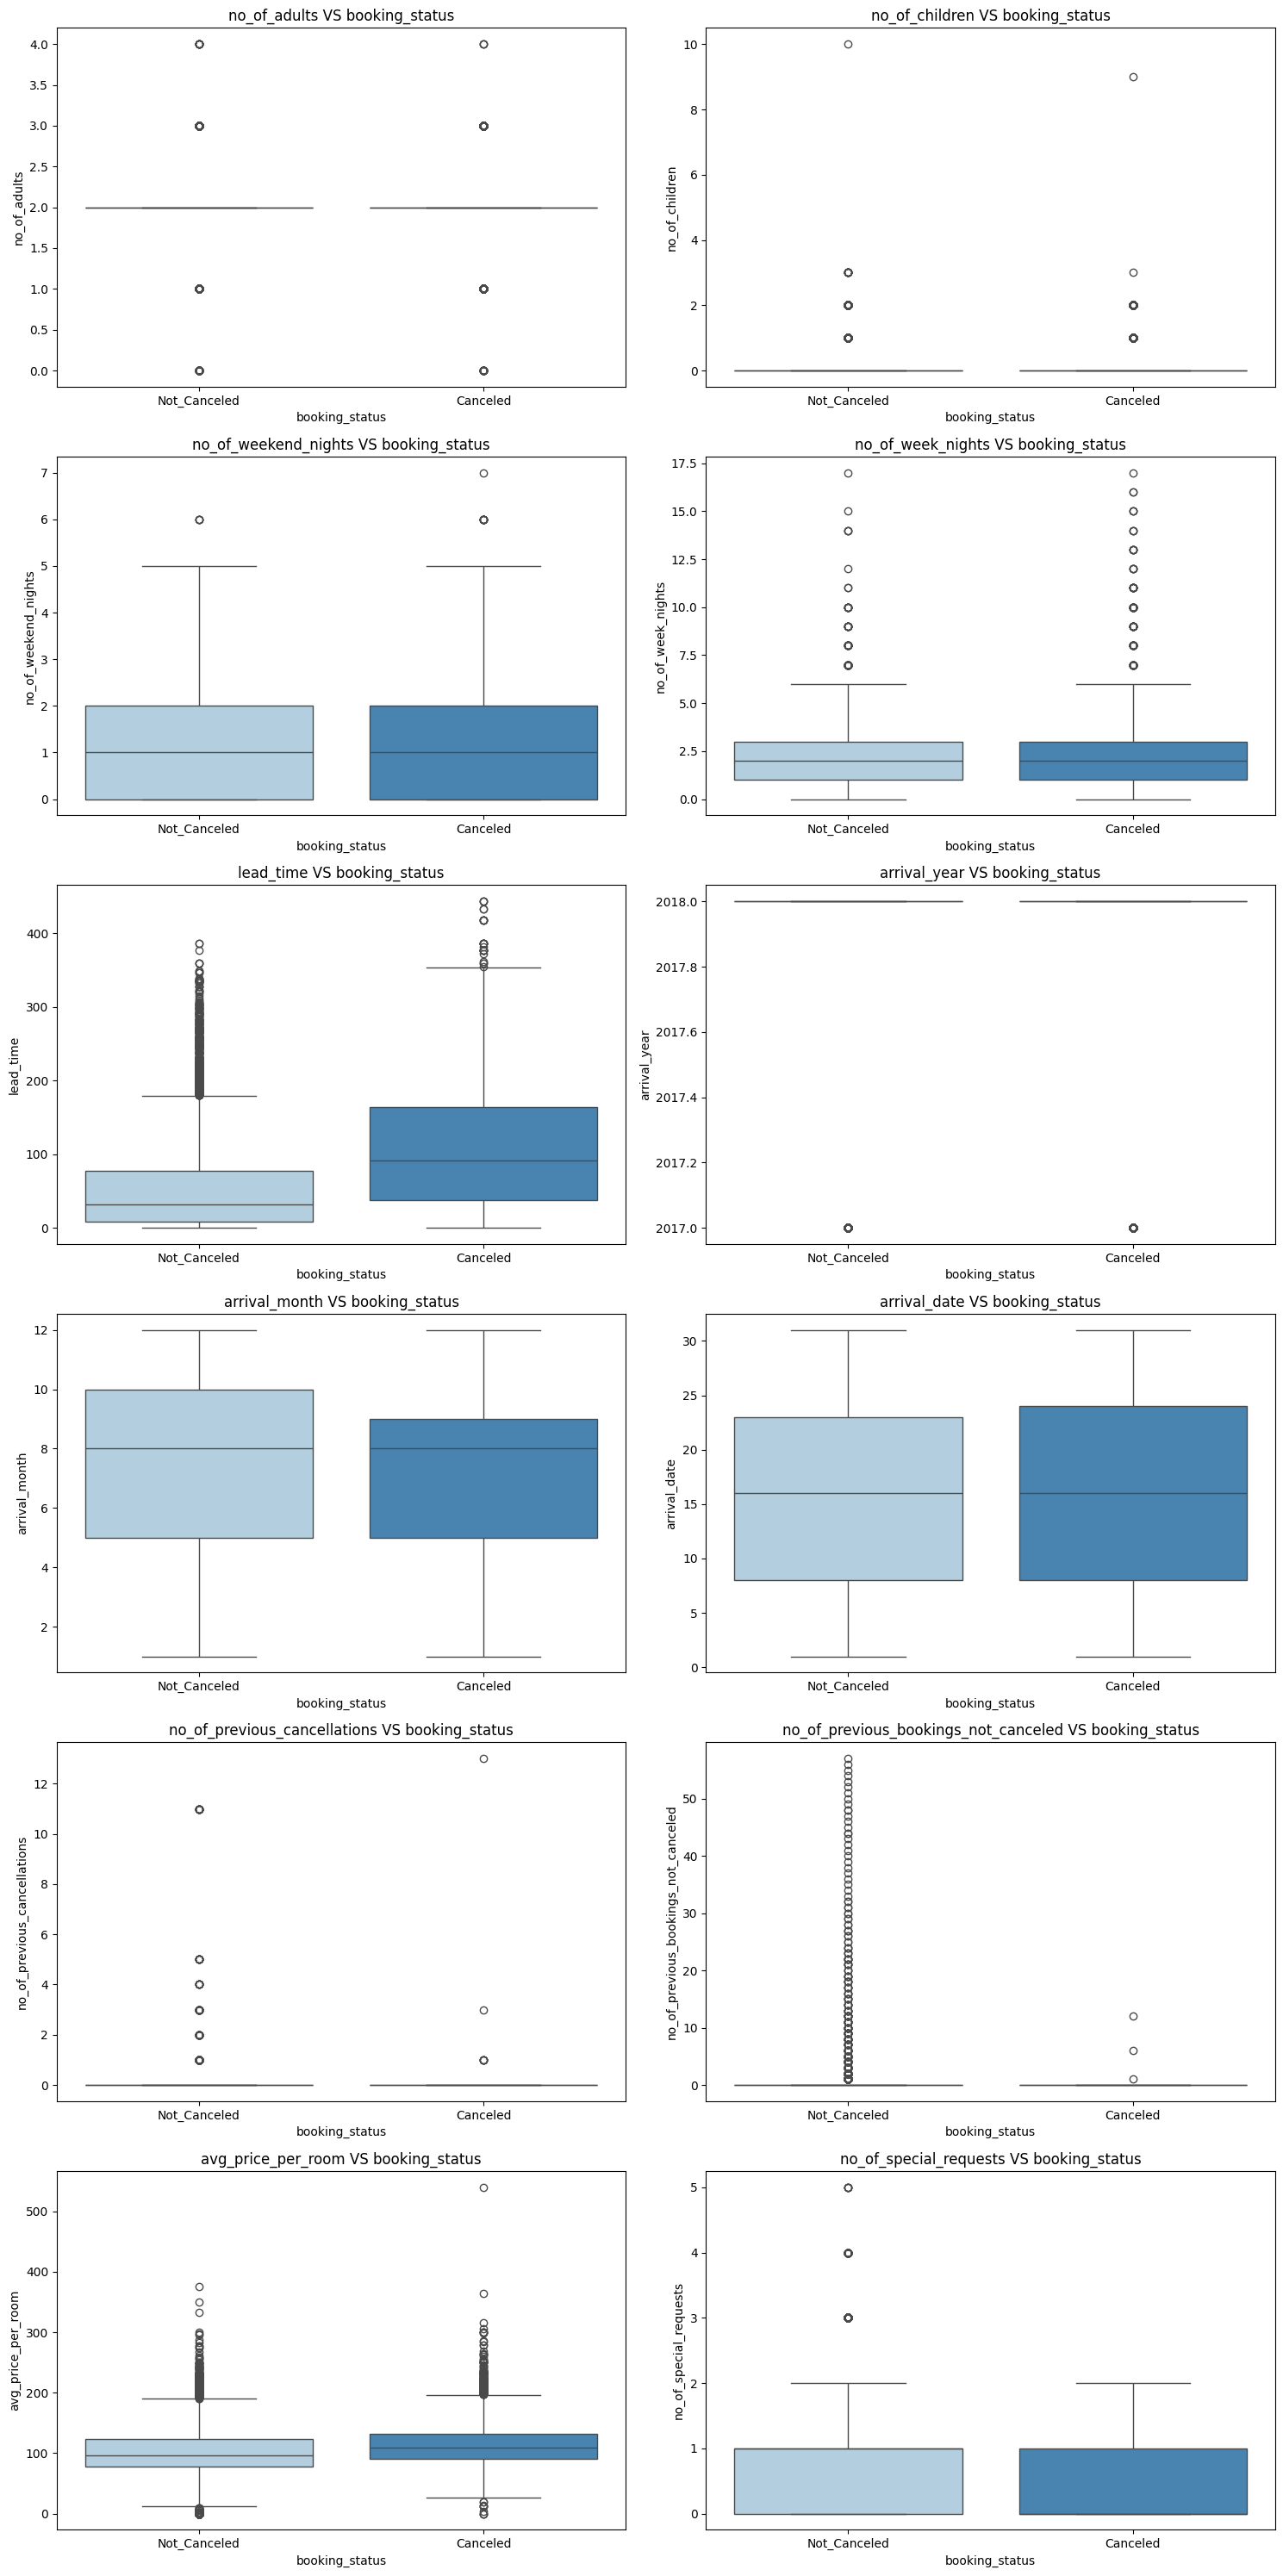

In [26]:
plot_bivariate_num(data, "booking_status", num_cols)

<function matplotlib.pyplot.show(close=None, block=None)>

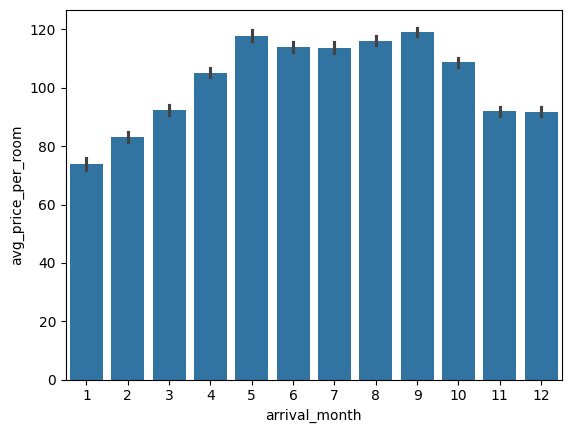

In [27]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show

In [28]:
def plot_bivariate_cat(df, target, cat_freature):

    num_features = len(cat_freature)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2 , figsize=(15,num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_freature):
        sns.countplot(x=feature, hue = target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

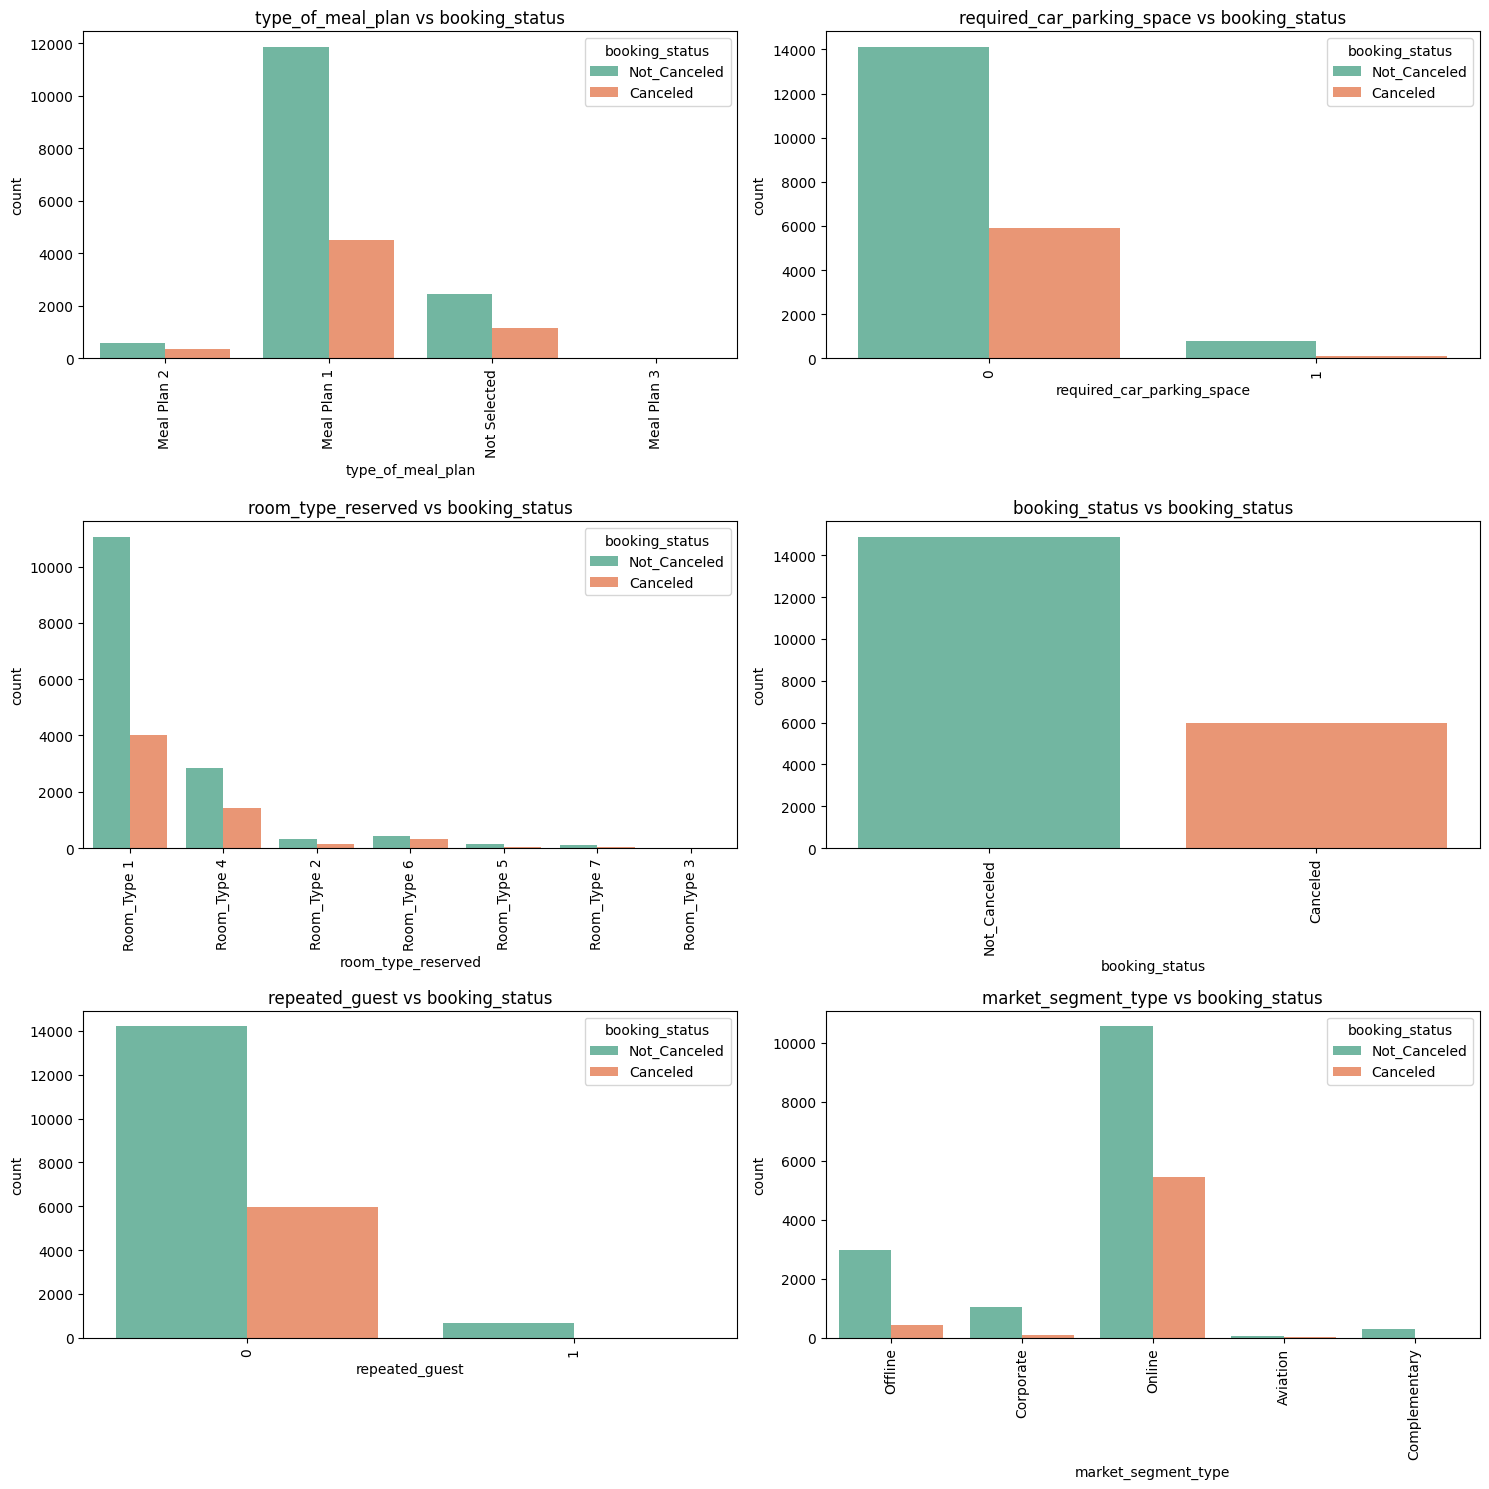

In [29]:
plot_bivariate_cat(data,"booking_status",cat_cols)

In [30]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled
1,1,0,0,2,Meal Plan 1,1,Room_Type 1,0,2017,10,27,Corporate,1,0,1,65.00,0,Not_Canceled
2,2,0,2,3,Meal Plan 1,0,Room_Type 1,6,2018,6,26,Online,0,0,0,103.64,0,Canceled
3,1,0,1,2,Meal Plan 1,0,Room_Type 1,19,2018,5,2,Online,0,0,0,120.00,0,Not_Canceled
4,1,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,5,25,Online,0,0,0,106.25,1,Not_Canceled


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20889 entries, 0 to 28293
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          20889 non-null  int64  
 1   no_of_children                        20889 non-null  int64  
 2   no_of_weekend_nights                  20889 non-null  int64  
 3   no_of_week_nights                     20889 non-null  int64  
 4   type_of_meal_plan                     20889 non-null  object 
 5   required_car_parking_space            20889 non-null  int64  
 6   room_type_reserved                    20889 non-null  object 
 7   lead_time                             20889 non-null  int64  
 8   arrival_year                          20889 non-null  int64  
 9   arrival_month                         20889 non-null  int64  
 10  arrival_date                          20889 non-null  int64  
 11  market_segment_type 

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

mappings = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    mappings[col] = {
        (label.item() if isinstance(label, np.generic) else label):
        int(code)
        for label, code in zip(le.classes_, le.transform(le.classes_))
    }


In [34]:
df["type_of_meal_plan"]

0        1
1        0
2        0
3        0
4        0
        ..
28286    1
28287    0
28288    0
28289    0
28293    1
Name: type_of_meal_plan, Length: 20889, dtype: int64

In [35]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1},
 'repeated_guest': {0: 0, 1: 1},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4}}

In [37]:
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")


type_of_meal_plan: {'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Meal Plan 3': 2, 'Not Selected': 3}
required_car_parking_space: {0: 0, 1: 1}
room_type_reserved: {'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}
booking_status: {'Canceled': 0, 'Not_Canceled': 1}
repeated_guest: {0: 0, 1: 1}
market_segment_type: {'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Offline': 3, 'Online': 4}


In [38]:
df.head()
    

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,2,1,0,0,257,2017,7,1,3,0,0,0,80.00,0,1
1,1,0,0,2,0,1,0,0,2017,10,27,2,1,0,1,65.00,0,1
2,2,0,2,3,0,0,0,6,2018,6,26,4,0,0,0,103.64,0,0
3,1,0,1,2,0,0,0,19,2018,5,2,4,0,0,0,120.00,0,1
4,1,0,0,1,0,0,0,8,2018,5,25,4,0,0,0,106.25,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20889 entries, 0 to 28293
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          20889 non-null  int64  
 1   no_of_children                        20889 non-null  int64  
 2   no_of_weekend_nights                  20889 non-null  int64  
 3   no_of_week_nights                     20889 non-null  int64  
 4   type_of_meal_plan                     20889 non-null  int64  
 5   required_car_parking_space            20889 non-null  int64  
 6   room_type_reserved                    20889 non-null  int64  
 7   lead_time                             20889 non-null  int64  
 8   arrival_year                          20889 non-null  int64  
 9   arrival_month                         20889 non-null  int64  
 10  arrival_date                          20889 non-null  int64  
 11  market_segment_type 

In [40]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [42]:
X = add_constant(df)

vif_data  = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [43]:
vif_data

,feature,VIF
0,const,4.077387e+07
1,no_of_adults,1.332011e+00
2,no_of_children,1.276702e+00
3,no_of_weekend_nights,1.078120e+00
4,no_of_week_nights,1.127895e+00
5,type_of_meal_plan,1.180366e+00
6,required_car_parking_space,1.035891e+00
7,room_type_reserved,1.545534e+00
8,lead_time,1.396936e+00
9,arrival_year,1.288997e+00


In [44]:
corr = df.corr()

In [45]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.042500,0.099098,0.114130,-0.007591,-0.003884,0.272719,0.152355,0.091379,0.006682,0.026042,0.308632,-0.237190,-0.062967,-0.144889,0.324050,0.152881,-0.097160
no_of_children,-0.042500,1.000000,0.006659,0.020020,-0.105790,0.022054,0.358087,0.008118,0.032588,0.004679,0.026805,0.097902,-0.048630,-0.021224,-0.029276,0.346493,0.099046,-0.062287
no_of_weekend_nights,0.099098,0.006659,1.000000,0.228898,-0.042654,-0.059978,0.023075,0.135064,0.026903,0.013753,0.003391,0.095937,-0.090237,-0.028544,-0.035873,-0.004510,0.017032,-0.073301
no_of_week_nights,0.114130,0.020020,0.228898,1.000000,-0.077062,-0.062070,0.079664,0.221557,0.012514,0.036027,-0.002924,0.116896,-0.116682,-0.034627,-0.054882,0.013156,0.034255,-0.125266
type_of_meal_plan,-0.007591,-0.105790,-0.042654,-0.077062,1.000000,-0.023927,-0.246280,-0.051087,0.102944,0.007641,-0.006821,0.182951,-0.072852,-0.011355,-0.045216,-0.103918,-0.010375,-0.039492
required_car_parking_space,-0.003884,0.022054,-0.059978,-0.062070,-0.023927,1.000000,0.016934,-0.040269,0.009748,-0.017161,-0.007108,-0.045976,0.116668,0.033201,0.062881,0.055943,0.071335,0.086391
room_type_reserved,0.272719,0.358087,0.023075,0.079664,-0.246280,0.016934,1.000000,-0.021488,0.084743,0.000537,0.031442,0.087102,-0.044283,-0.015416,-0.022091,0.485939,0.086659,-0.071612
lead_time,0.152355,0.008118,0.135064,0.221557,-0.051087,-0.040269,-0.021488,1.000000,0.167233,0.129047,0.041367,0.139418,-0.149991,-0.056373,-0.088651,-0.043257,-0.011148,-0.367128
arrival_year,0.091379,0.032588,0.026903,0.012514,0.102944,0.009748,0.084743,0.167233,1.000000,-0.324042,0.016771,0.113786,-0.010525,0.012235,0.025986,0.174905,0.001933,-0.150953
arrival_month,0.006682,0.004679,0.013753,0.036027,0.007641,-0.017161,0.000537,0.129047,-0.324042,1.000000,-0.022627,-0.016177,-0.005105,-0.048396,-0.008876,0.061476,0.131514,0.015584


<Axes: >

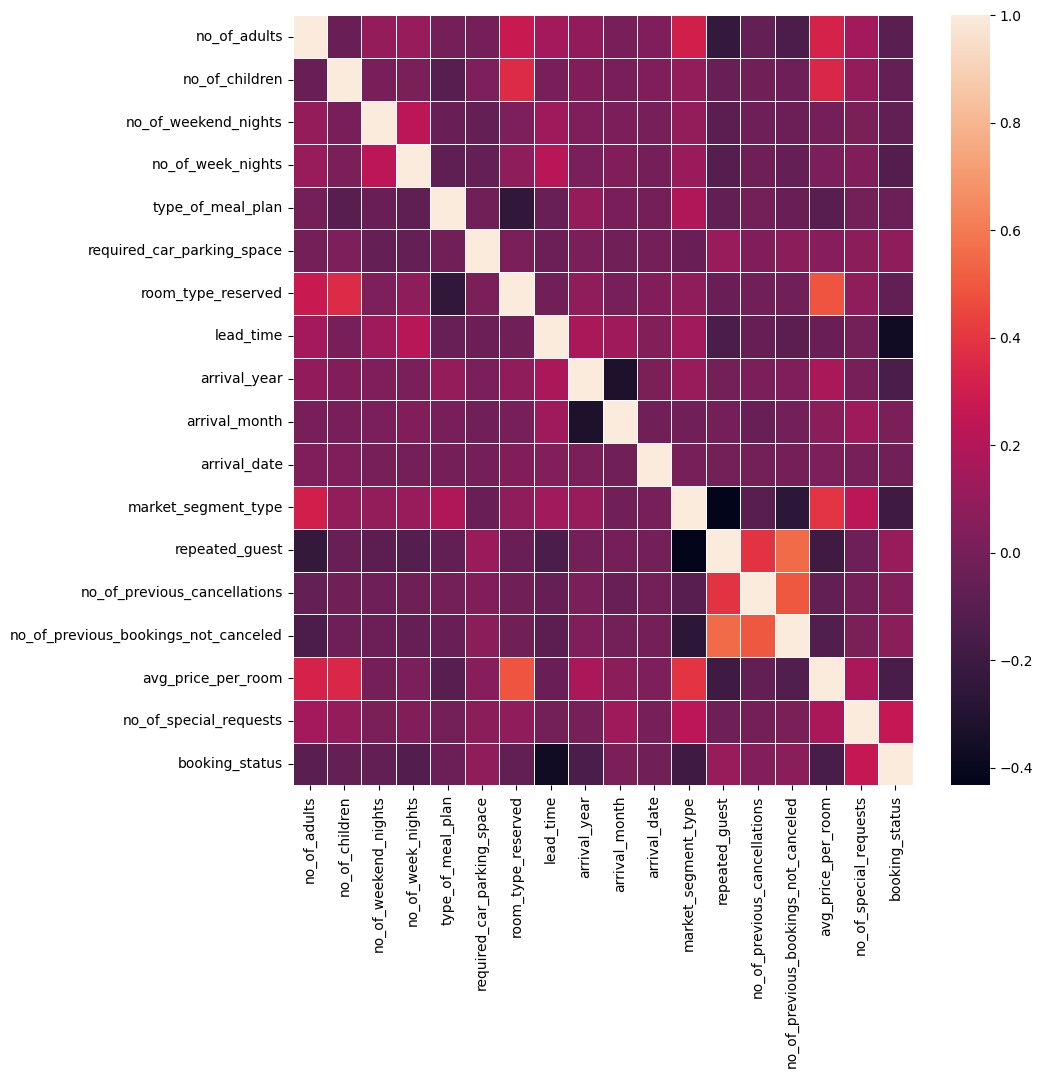

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5)

In [47]:
skewness = df.skew()

In [48]:
skewness

no_of_adults                            -0.286586
no_of_children                           4.003961
no_of_weekend_nights                     0.653890
no_of_week_nights                        1.558937
type_of_meal_plan                        1.632179
required_car_parking_space               4.597800
room_type_reserved                       1.405806
lead_time                                1.410564
arrival_year                            -1.941400
arrival_month                           -0.297718
arrival_date                             0.011203
market_segment_type                     -2.354005
repeated_guest                           5.247166
no_of_previous_cancellations            21.363865
no_of_previous_bookings_not_canceled    15.793253
avg_price_per_room                       0.611981
no_of_special_requests                   0.924562
booking_status                          -0.941829
dtype: float64

In [49]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [52]:
df.skew()

no_of_adults                            -0.286586
no_of_children                           4.003961
no_of_weekend_nights                     0.653890
no_of_week_nights                        1.558937
type_of_meal_plan                        1.632179
required_car_parking_space               4.597800
room_type_reserved                       1.405806
lead_time                                1.410564
arrival_year                            -1.941400
arrival_month                           -0.297718
arrival_date                             0.011203
market_segment_type                     -2.354005
repeated_guest                           5.247166
no_of_previous_cancellations            13.038948
no_of_previous_bookings_not_canceled     7.610525
avg_price_per_room                       0.611981
no_of_special_requests                   0.924562
booking_status                          -0.941829
dtype: float64

In [53]:
from sklearn.preprocessing import PowerTransformer

# Columns with high skewness
high_skew_cols = skewness[skewness > 5].index

# Use Yeo-Johnson transformation (works on everything)
pt = PowerTransformer(method='yeo-johnson')

# Fit & transform the highly skewed columns
df[high_skew_cols] = pt.fit_transform(df[high_skew_cols])



In [54]:
new_skew = df[high_skew_cols].skew()
print(new_skew)


repeated_guest                          5.247166
no_of_previous_cancellations            9.612878
no_of_previous_bookings_not_canceled    5.442798
dtype: float64


In [55]:
df.skew()

no_of_adults                           -0.286586
no_of_children                          4.003961
no_of_weekend_nights                    0.653890
no_of_week_nights                       1.558937
type_of_meal_plan                       1.632179
required_car_parking_space              4.597800
room_type_reserved                      1.405806
lead_time                               1.410564
arrival_year                           -1.941400
arrival_month                          -0.297718
arrival_date                            0.011203
market_segment_type                    -2.354005
repeated_guest                          5.247166
no_of_previous_cancellations            9.612878
no_of_previous_bookings_not_canceled    5.442798
avg_price_per_room                      0.611981
no_of_special_requests                  0.924562
booking_status                         -0.941829
dtype: float64

In [117]:
df["booking_status"].value_counts()

booking_status
1    14894
0     5995
Name: count, dtype: int64

In [118]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [119]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [121]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: booking_status, dtype: int64

In [122]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [123]:
y.value_counts()

booking_status
1    14894
0     5995
Name: count, dtype: int64

In [124]:
from imblearn.over_sampling import SMOTE

In [125]:
smote = SMOTE(random_state=32)
X_res, y_res = smote.fit_resample(X,y)

In [126]:
y_res.value_counts()

booking_status
1    14894
0    14894
Name: count, dtype: int64

In [127]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [128]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,2,1,0,0,257,2017,7,1,3,-0.184131,-0.102932,-0.177925,80.00,0,1
1,1,0,0,2,0,1,0,0,2017,10,27,2,5.430920,-0.102932,5.620333,65.00,0,1
2,2,0,2,3,0,0,0,6,2018,6,26,4,-0.184131,-0.102932,-0.177925,103.64,0,0
3,1,0,1,2,0,0,0,19,2018,5,2,4,-0.184131,-0.102932,-0.177925,120.00,0,1
4,1,0,0,1,0,0,0,8,2018,5,25,4,-0.184131,-0.102932,-0.177925,106.25,1,1


In [130]:
balanced_df.shape

(29788, 18)

In [131]:
df = balanced_df.copy()

In [133]:
df.shape

(29788, 18)

In [134]:
len(df.columns)

18

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [137]:
model = RandomForestClassifier(random_state=32)
model.fit(X,y)

RandomForestClassifier(random_state=32)

In [143]:
feature_importance = model.feature_importances_

In [144]:
feautre_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance':feature_importance
})

In [149]:
top_imporatance_features_df = feautre_importance_df.sort_values(by="importance", ascending=False)

In [148]:
len(df.columns)

18

In [150]:
top_10_features = top_imporatance_features_df["feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [151]:
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,257,0,80.000000,7,1,3,2,0,1,0,1
1,0,0,65.000000,10,27,2,2,0,0,0,1
2,6,0,103.640000,6,26,4,3,2,0,0,0
3,19,0,120.000000,5,2,4,2,1,0,0,1
4,8,1,106.250000,5,25,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
29783,374,0,92.719391,11,27,4,2,0,0,0,0
29784,93,0,75.642448,5,21,4,2,0,0,0,0
29785,41,0,105.418101,10,2,4,1,1,0,0,0
29786,60,0,67.987079,11,18,3,1,2,0,0,0


In [152]:
len(top_10_df.columns)

11

In [153]:
df = top_10_df.copy()

In [154]:
%pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [157]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=32,shuffle=True,test_size=0.22)

In [160]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state = 42),
    "LogisticRegression": LogisticRegression(random_state = 42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state = 42),
    "SupportVectorClassifer": SVC(random_state = 42),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state = 42),
    "KNN":KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "XGBClassifier":XGBClassifier(random_state = 42),
    "AdaBoostClassifier":AdaBoostClassifier(random_state = 42),
    "LGBM": LGBMClassifier(random_state = 42)
}

In [161]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall": [],
    "f1_score": []
}

In [163]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    presicion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(presicion)
    metrics["Recall"].append(recall)
    metrics["f1_score"].append(f1)


[LightGBM] [Info] Number of positive: 11644, number of negative: 11590
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 23234, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501162 -> initscore=0.004648
[LightGBM] [Info] Start training from score 0.004648


In [164]:
metrics_df = pd.DataFrame(metrics)

In [165]:
metrics_df

,Model,Accuracy,Precision,Recall,f1_score
0,Random Forest,0.883277,0.887918,0.875077,0.881450
1,LogisticRegression,0.767165,0.788874,0.724308,0.755213
2,GradientBoostingClassifier,0.833384,0.819231,0.852000,0.835294
3,SupportVectorClassifer,0.715899,0.722864,0.692615,0.707417
4,DecisionTreeClassifier,0.837504,0.853674,0.811385,0.831992
5,KNN,0.781813,0.843915,0.687077,0.757463
6,NaiveBayes,0.767775,0.790518,0.723385,0.755463
7,XGBClassifier,0.867867,0.869498,0.863077,0.866275
8,AdaBoostClassifier,0.800580,0.816553,0.771077,0.793163
9,LGBM,0.856424,0.852089,0.859692,0.855874


In [166]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [167]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=32,shuffle=True,test_size=0.22)

In [170]:
rf = RandomForestClassifier(random_state=32)

In [181]:
params_dist = {
    'n_estimators' : randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True,False],
}

In [182]:
random_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions=params_dist,
    n_iter=10,
    cv = 5,
    verbose=2,
    random_state=32,
    scoring='accuracy'
)

In [183]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=188; total time=   3.2s
[CV] END bootstrap=False, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=188; total time=   3.0s
[CV] END bootstrap=False, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=188; total time=   3.0s
[CV] END bootstrap=False, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=188; total time=   3.0s
[CV] END bootstrap=False, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=188; total time=   3.2s
[CV] END bootstrap=False, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=359; total time=   6.2s
[CV] END bootstrap=False, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=359; total time=   6.2s
[CV] END bootstrap=False, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=359; total time=   

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=32),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11e61f1a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11e61c4a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11e61e750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11e61fdd0>},
                   random_state=32, scoring='accuracy', verbose=2)

In [184]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 257}

In [185]:
best_rf_model = random_search.best_estimator_

In [186]:
ypred = best_rf_model.predict(X_test)

In [187]:
accuracy = accuracy_score(y_test, y_pred)
presicion = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

In [188]:
recall

0.8596923076923076

In [189]:
f1

0.855873793842855

In [190]:
presicion

0.8520890515401037

In [191]:
accuracy

0.8564235581324382

In [192]:
import joblib

In [193]:
joblib.dump(best_rf_model,"RandomForestClassifier.pkl")

['RandomForestClassifier.pkl']

In [194]:
loaded_model = joblib.load("RandomForestClassifier.pkl")

In [196]:
X_train[7:8]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
16834,38,0,85.5,6,18,3,1,1,0,0


In [200]:
new_data = np.array([38	,0	,85.5,	6,	18,	3,	1,	1,	0,	0]).reshape(1,-1)

In [201]:
predictions = loaded_model.predict(new_data)

In [202]:
predictions

array([1])